In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
seoul_traffic = pd.read_excel('./data/노선별 시간대별 교통량(평일).xlsx')
seoul_traffic.head(8)

,서울도시고속도로 노선별 시간대별 교통량(평일평균),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,(단위 : 대/일)
0,시간대,내부순환로,NaN,강변북로,NaN,북부간선도로,NaN,올림픽대로,NaN,동부간선도로,NaN,분당수서로,NaN,경부고속도로,NaN,서부간선도로,NaN,강남순환로,NaN
1,NaN,동향,서향,동향,서향,동향,서향,동향,서향,북향,남향,북향,남향,북향,남향,북향,남향,동향,서향
2,0,1296,1012,2480,2086,1070,814,1945,2790,1916,1118,988,1097,1822,2239,1356,1486,531,803
3,1,880,695,1633,1374,748,570,1308,1974,1278,745,749,684,1297,1456,869,933,309,480
4,2,634,528,1217,1002,588,440,1018,1537,907,567,576,512,1015,1102,651,668,220,322
5,3,590,536,1182,924,561,499,1124,1362,768,647,540,489,971,1113,667,636,213,268
6,4,923,1027,1985,1250,928,925,1989,1726,896,1356,756,784,1271,1950,1229,1175,414,366
7,5,2348,2793,5145,2867,2258,2300,5212,3331,1683,3877,1901,2590,3080,4598,2485,2328,1882,933


In [3]:
#서부간선도로 북향
seo_n = seoul_traffic.iloc[2:,15]
seo_n

2     1356
3      869
4      651
5      667
6     1229
7     2485
8     2390
9     2131
10    1727
11    1983
12    1934
13    1887
14    2001
15    1943
16    1879
17    1860
18    1739
19    1491
20    1362
21    1661
22    2117
23    2215
24    2184
25    1999
Name: Unnamed: 15, dtype: object

In [4]:
#서부간선도로 남향
seo_s = seoul_traffic.iloc[2:,16]
seo_s

2     1486
3      933
4      668
5      636
6     1175
7     2328
8     2951
9     2260
10    1851
11    2144
12    2535
13    2751
14    2779
15    2722
16    2696
17    2678
18    2547
19    2224
20    2129
21    2390
22    2748
23    2909
24    2820
25    2310
Name: Unnamed: 16, dtype: object

In [5]:
#서부간선도로 북향,남향 통행량 차이
seo= seoul_traffic.iloc[2:,15:17]
seo = seo.diff(axis=1)
seo = seo.abs()
seo_diff = seo.iloc[:,1]
seo_diff = seo_diff.values

In [6]:
#서부간선도로 통행량 평균
seo = seoul_traffic.iloc[2:,13:15]
seo_mean = seo.mean(axis=1)
seo_mean = seo_mean.values

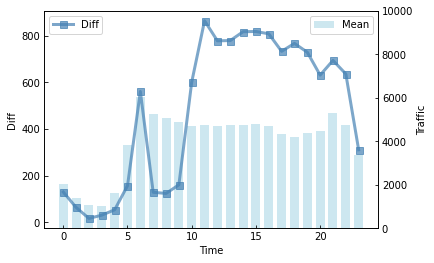

In [7]:
#시각화하기
# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 9

# 2. 데이터 준비
x = np.arange(24)
time = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]

# 3. 그래프 그리기
fig, ax1 = plt.subplots()

ax1.plot(x, seo_diff, '-s', color='steelblue', markersize=7, linewidth=3, alpha=0.7, label='Diff')
ax1.set_xlabel('Time')
ax1.set_ylabel('Diff')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(x, seo_mean, color='lightblue', label='Mean', alpha=0.6, width=0.7)
ax2.set_ylabel('Traffic')
ax2.tick_params(axis='y', direction='in')
ax2.set_ylim(0, 10000)

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()